<h1>
    M391 Homework Due 09/02/2020
</h1>
<h2>
    Corrections Due 09/07/2020.  Very nice work.  9/9.
</h2>

<h3>
    Exercise 1.2.4
</h3>

Use Sage to check that the general solution to the falling body problem $$mv' + kv = mg$$, is $v(t) = \frac{mg}{k} + ce^{\frac{-kt}{m}}$ if $v(0) = v_0$, you can solve for $c$ in terms of $v_0$ to get $c = v_0 - \frac{mg}{k}$. Take $m = k = v_0 = 1, g = 9.8$ and use Sage to plot $v(t)$ for $0 < t < 1$.

In [4]:
t = var('t')
m = 1
k = 1
v0 = 1
g = 9.8
C = -8.8
v = function('v')(t)

In [5]:
de = lambda x: m*diff(x,t) + k*x - m*g

In [6]:
s = desolve(de(v),[v,t])

In [7]:
print('The solution to the DE is v(t) ='),s.show()

The solution to the DE is v(t) =


1/5*(5*_C + 49*e^t)*e^(-t)

(None, None)

Let's plug our solution for $v(t)$ back into the differential equation.  If zero is returned, our solution is verified:

In [8]:
de(s).show()

0.000000000000000

The solution is verified.  Now let's plot $v(t)$.  Note that we plugged in -8.8 for C as defined in the prompt.

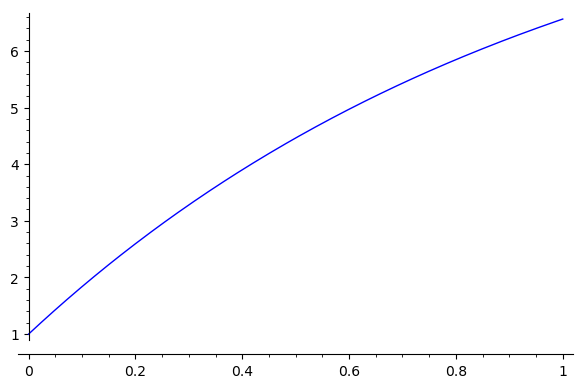

In [11]:
#the equation was simplified to increase ease of debugging
plot(0.2*(-44 + 49*e**t)*e**(-t), (t,0,1))

<h3>
    Exercise 1.2.5
</h3>

Consider a spacecraft falling towards the moon at a speed of 500 m/s at a height of 50 km.  Assume that the moon's acceleration on the spacecraft is a constant $~1.63m/s^{2}$ when the spacecraft's rockets are engaged.  The total acceleration on the rocket (gravity + thrust) is $3 m/s^{2}$.  At what height should the rockets be engaged so that the spacecraft lands at zero velocity?

Let  $t_0$  be the time that the rockets are engaged and let  $t_1$  be the time that the height of the rocket is zero.

In [3]:
t0,t1,t=var('t_0,t_1,t')

In [8]:
# Let h(t) be the height (in m) above the moon at time t (in seconds)
h0=50000
# Let a be the acceleration due to gravity on the moon (in m/s^2)
a=-1.63
# Let v1 be the velocity of the rocket from time zero to when the rockets are engaged
v1=lambda t: a*t+500
# Let v2 be the velocity of the rocket from the time the rockets are engaged to when the height of the rocket above the moon is zero
v2=lambda t: 3*((t-t_0))+v1(t_0)

 Now, let's check that  v1  and  v2  are the correct solutions to the IVPs:

In [5]:
print('dv1/dt=',diff(v1(t),t))
print('v1(0)=',v1(0))

print('dv2/dt=',diff(v2(t),t))
print('v2(t_0)-v1(t_0)=',(v2(t_0)-v1(t_0)).full_simplify())

dv1/dt= -1.63000000000000
v1(0)= 500.000000000000
dv2/dt= 3
v2(t_0)-v1(t_0)= 0


In [7]:
print("The velocity functions are:")
v1(t).full_simplify().show()
v2(t).full_simplify().show()

The velocity functions are:


-1.63*t + 500

3*t - 4.63*t_0 + 500

We want $v_2(t_0)$ to be $0$, to indicate the rocket coming to a rest on the surface of the moon. So lets first solve $v_2(t_1) = 0$ for $t_1$:

In [9]:
solve(v2(t_1)==0,t_1)

[t_1 == 463/300*t_0 - 500/3]

In [10]:
t1=463/300*t_0 - 500/3

This gives us another IVP that we can integrate to find the height functions $h_1$ and $h_2$ that correspond to $v_1$ and $v_2$.  If we set up our functions right, $h_2(t_0)$ will be equal to $h_1(t_0)$.

In [11]:
h1=lambda t: a*t^2/2+500*t+50000
h2=lambda t: (3*t^2/2+(a-3)*t_0*t+500*t) - (3*t_0^2/2+(a-3)*t_0^2+500*t_0) + h1(t_0)

Let's check that $h_1$ and $h_2$ give the correct solutions for the IVP:

In [12]:
[(diff(h1(t),t)-v1(t)).full_simplify(),
 (diff(h2(t),t)-v2(t)).full_simplify(),
 (h1(t_0)-h2(t_0)).full_simplify(),
 h1(0)
]

[0, 0, 0, 50000.0000000000]

In [13]:
print("The height functions are:")
h1(t).full_simplify().show()
h2(t).full_simplify().show()

The height functions are:


-0.815*t^2 + 500*t + 50000

1.5*t^2 - 4.63*t*t_0 + 2.315*t_0^2 + 500.0*t + 50000.0

Now we can finally solve for $t_0$:

In [14]:
solve(h2(t1)==0,t_0)

[t_0 == -10000/75469*sqrt(5736570) + 50000/163, t_0 == 10000/75469*sqrt(5736570) + 50000/163]

Let's print the first solution, which is negative:

In [15]:
print(N(-10000/75469*sqrt(5736570) + 50000/163))
t0=10000/75469*sqrt(5736570) + 50000/163

-10.6154548229255


In [16]:
t1=463/300*t0 - 500/3
print (N(t0),N(t1))

624.112387338263 796.546784458719


Let's check that all our key values match up:

In [17]:
print('v1(0)=',v1(0))
print('v1(t0)-v2(t0)=',(v1(t0)-v2(t0)).substitute(t_0=t0).full_simplify())
print('v2(t1)=',v2(t1).substitute(t_0=t0).full_simplify())
print('h1(0)=',h1(0))
print('h1(t0)-h2(t0)=',N(h1(t0)-h2(t0).substitute(t_0=t0)))
print('h1(t0)=', N(h1(t0).substitute(t_0=t0)))
print('h2(t1)=',N(h2(t1).substitute(t_0=t0)))

v1(0)= 500.000000000000
v1(t0)-v2(t0)= 0
v2(t1)= 0
h1(0)= 50000.0000000000
h1(t0)-h2(t0)= 1.92425691551827e-10
h1(t0)= 44600.4319654428
h2(t1)= -2.91038304567337e-10


Plot of the resulting velocity functions:

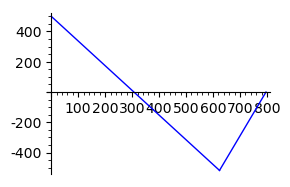

In [18]:
show(plot(v1(t).substitute(t_0=t0),0,N(t0))+plot(v2(t).substitute(t_0=t0),N(t0),N(t1)), figsize=3)

We have found that $h_2$, the height above the moon at which the rockets should be engaged in order for the spacecraft to land at zero velocity is $-2.91038304567337*10^{-10}$

<h3>
    Problem 1 from 1.4.2
</h3>

Find the general soln to  $y′=y(y−1)(y−2)$ .

$$\frac{dy}{dt} = y(y-1)(y-2)$$

$$\frac{dy}{y(y-1)(y-2)} = dt$$

$$\int\frac{dy}{y(y-1)(y-2)} = \int dt$$

$$-ln\vert y-1\vert + \frac{1}{2}ln\vert y \vert + \frac{1}{2}ln\vert y-2 \vert = t + c$$

$$\frac{\sqrt{y(y-2)}}{y-1} = Ke^t$$

where $K \in Z$

<h3>
    Problem 2 from 1.4.2
</h3>

Find the general soln to  $y'= y^2- 4$ .

$$\frac{dy}{dt} = y^2 - 4$$

$$\frac{dy}{(y-2)(y+2)} = dt$$

$$\int\frac{dy}{(y-2)(y+2)} = \int dt$$

$$-\frac{1}{4}ln\vert y+2 \vert + \frac{1}{4}ln\vert y-2 \vert = t + c$$

$$ln \vert \frac{\sqrt[4]{y-2}}{\sqrt[4]{y+2}} \vert = t + c$$

$$ (\frac{y-2}{y+2})^{\frac{1}{4}} = Ke^t$$

where $K \in Z$

<h3>
    Problem 3 from 1.4.2
</h3>

Solve  $x'+x=1$ where $x(0)=0$ .

$$\frac{dy}{dt} = 1 - x$$

$$\frac{dx}{1-x} = dt$$

$$\int\frac{dx}{1-x} = \int dt$$

$$ \frac{1}{1-x} = Ke^t$$

Since $x(0)=0$, we get $K=1$

So,  $1−x=e^t$  and  $x(t)=1−e^t$ .

<h3>
    Graphing Problem 1
</h3>

"Graph ${xy=c}$ and it's orthogonal family."

To find the orthogonal family of curves, start by putting the function in form $y=\frac{c}{x}$, then the derivative is: $\frac{dy}{dx}=\frac{-c}{x^{2}}$.  Substituting in $c=xy$, that is: $\frac{dy}{dx}=\frac{-xy}{x^{2}}$ or $\frac{dy}{dx}=\frac{-y}{x}$. To find the ODE for the orthogonal family, we take the negative reciprocal of the ODE we just found. We get: $\frac{dy}{dx}=\frac{x}{y}$. To find the equation for the orthogonal family, we separate and integrate this new ODE: $\int y dy = \int x dx$, so $\frac{y^{2}}{2} = \frac{x^{2}}{2} + C$ or $$y^{2} - x^{2} = C$$ 

In [29]:
x = var('x')
y = var('y')

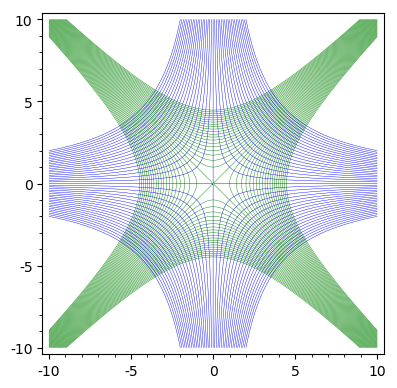

In [16]:
# blue lines denote the given function, green lines denote the orthogonal family of curves
show(sum([implicit_plot((y^2 - x^2 - c), (x,-10,10),(y,-10,10),cmap=['green'],linewidth=.3)+implicit_plot(x*y-c,(x,-10,10),(y,-10,10),linewidth=.3) for c in range(-20,21)]))


<h3>
    Graphing Problem 2
</h3>

"Graph ${y=cx^{2}}$ and it's orthogonal family."

To find the orthogonal family of curves, take the derivative to get: $\frac{dy}{dx}= 2cx$.  Substituting in $c=\frac{y}{x^{2}}$, that is: $\frac{dy}{dx}=\frac{2y}{x}$. To find the ODE for the orthogonal family, we take the negative reciprocal of the ODE we just found. We get: $\frac{dy}{dx}=\frac{-x}{2y}$. To find the equation for the orthogonal family, we separate and integrate this new ODE: $\int 2y dy = \int -x dx$, so $y^{2} = \frac{-x^{2}}{2} + C$ or $$y^{2} + \frac{x^{2}}{2} = C$$ 

In [12]:
x = var('x')
y = var('y')

/ext/sage/sage-9.1/local/lib/python3.7/site-packages/matplotlib/contour.py:1226: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


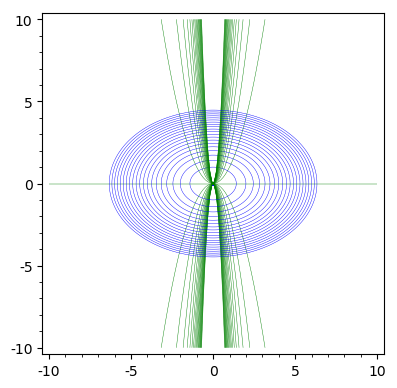

In [15]:
# blue lines denote the given function, green lines denote the orthogonal family of curves.
show(sum([implicit_plot((y-c*x^2), (x,-10,10),(y,-10,10),cmap=['green'],linewidth=.3)+implicit_plot(y^2 + (x^2/2) - c,(x,-10,10),(y,-10,10),linewidth=.3) for c in range(-20,21)]))


<h3>
    Graphing Problem 3
</h3>

"Graph ${y=cx^{4}}$ and it's orthogonal family."

The orthogonal family for this problem was found in a similar way to Problem 2. With that process, we get: $$2y^{2} + \frac{x^{2}}{2} = C$$

In [8]:
x = var('x')
y = var('y')

/ext/sage/sage-9.1/local/lib/python3.7/site-packages/matplotlib/contour.py:1226: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


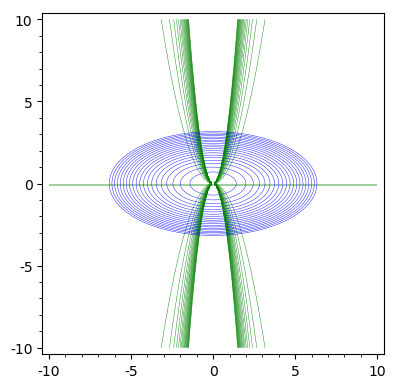

In [20]:
# blue lines denote the given function, green lines denote the orthogonal family of curves.
show(sum([implicit_plot((y^2 - c*x^4), (x,-10,10),(y,-10,10),cmap=['green'],linewidth=.3)+implicit_plot(2*y^2 + (x^2/2) - c,(x,-10,10),(y,-10,10),linewidth=.3) for c in range(-20,21)]))


<h3>
    Graphing Problem 4
</h3>

"Graph ${y=cx^{n}}$ and it's orthogonal family."

To find the orthogonal family of curves, take the derivative to get: $\frac{dy}{dx}= ncx$.  Substituting in $c=\frac{y}{x^{n}}$, that is: $\frac{dy}{dx}=\frac{ny}{x}$. To find the ODE for the orthogonal family, we take the negative reciprocal of the ODE we just found. We get: $\frac{dy}{dx}=\frac{-x}{ny}$. To find the equation for the orthogonal family, we separate and integrate this new ODE: $\int ny dy = \int -x dx$, so $ny^{2} = \frac{-x^{2}} + C$ or $$ny^{2} + x^{2} = C$$ 

In [22]:
x = var('x')
y = var('y')

/ext/sage/sage-9.1/local/lib/python3.7/site-packages/matplotlib/contour.py:1226: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


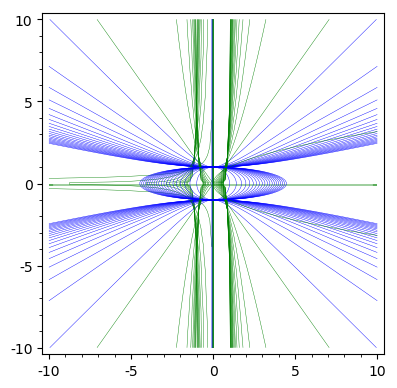

In [26]:
# blue lines denote the given function, green lines denote the orthogonal family of curves.
show(sum([implicit_plot((y^2 - c*x^c), (x,-10,10),(y,-10,10),cmap=['green'],linewidth=.3)+implicit_plot(c*y^2 + x^2 - c,(x,-10,10),(y,-10,10),linewidth=.3) for c in range(-20,21)]))
